In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
results = pd.read_csv('Results/rescale_simple.csv', index_col=0)
results.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_MYO,Dice_RV,IoU_BG,IoU_LV,IoU_MYO,IoU_RV,HD_BG,HD_LV,HD_MYO,HD_RV
External code,,,,,,,,,,,,,,
A0S9V9,F,6,0.994029,0.951729,0.850103,0.938918,0.988129,0.907904,0.739287,0.884869,2.0,4.123106,5.477226,5.000000
A1D0Q7,B,2,0.972764,0.909963,0.752150,0.764210,0.946973,0.834801,0.602757,0.618398,9.0,6.000000,9.000000,12.369317
A1D9Z7,A,1,0.972143,0.810889,0.696961,0.807776,0.945797,0.681929,0.534873,0.677537,5.0,19.026298,12.409674,25.573424
A1E9Q1,F,6,0.993624,0.953734,0.881328,0.949187,0.987329,0.911560,0.787834,0.903288,4.0,4.242641,4.000000,9.055385
A1K2P5,D,5,0.987351,0.920781,0.781335,0.906083,0.975018,0.853191,0.641140,0.828292,4.0,9.055385,10.049876,9.055385


In [5]:
grouped_by_vendor = results.groupby(['Vendor', 'Centre']).mean()
grouped_by_vendor

Dice_BG   Dice_LV  Dice_MYO   Dice_RV    IoU_BG    IoU_LV  \
Vendor Centre                                                               
A      1       0.981046  0.907815  0.806891  0.867467  0.962927  0.834911   
B      2       0.983042  0.914306  0.821965  0.877475  0.966730  0.843695   
       3       0.984338  0.908676  0.805328  0.878177  0.969221  0.835153   
C      4       0.980231  0.871532  0.761024  0.811939  0.961470  0.777930   
D      5       0.978851  0.871062  0.732317  0.827356  0.958800  0.777612   
F      6       0.993807  0.960412  0.900949  0.944747  0.987697  0.923993   

                IoU_MYO    IoU_RV     HD_BG      HD_LV     HD_MYO      HD_RV  
Vendor Centre                                                                 
A      1       0.679857  0.769397  5.010791   8.988398  10.936977  12.976727  
B      2       0.700369  0.787415  4.989893  10.454890  11.303707   9.749956  
       3       0.675896  0.787977  5.794666  12.253638  11.949721  11.889609  
C      4       0.620721  0.707762  4.911795  20.703314  17.931798  17.660449  
D      5       0.584332  0.721055  4.200073  18.729917  19.060037  31.138683  
F      6       0.820386  0.895878  3.391881   3.269073   5.248934   6.642493

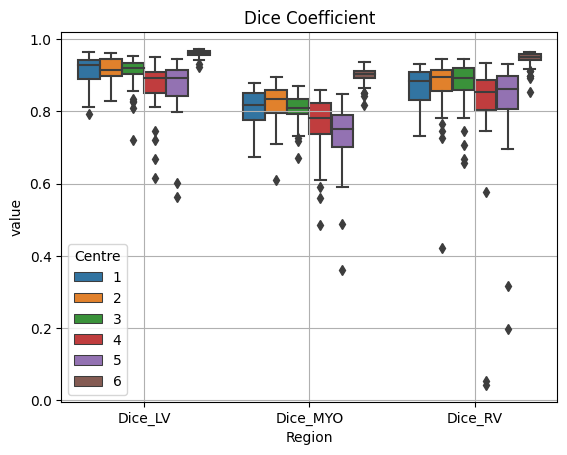

In [6]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['Dice_LV',
                                'Dice_MYO',
                                'Dice_RV'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("Dice Coefficient")
plt.grid(True)
plt.show()

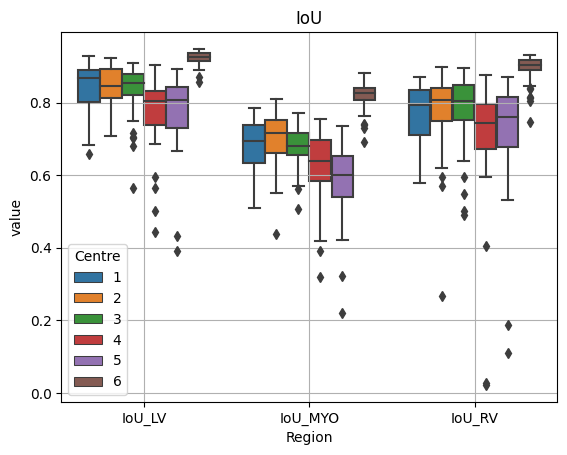

In [7]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['IoU_LV',
                                'IoU_MYO',
                                'IoU_RV'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("IoU")
plt.grid(True)
plt.show()

In [14]:
results2 = pd.read_csv('Results/Cross_Entropy.csv', index_col=0)
results2.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_MYO,Dice_RV,IoU_BG,IoU_LV,IoU_MYO,IoU_RV,HD_BG,HD_LV,HD_MYO,HD_RV
External code,,,,,,,,,,,,,,
A0S9V9,F,6,0.992769,0.956868,0.843114,0.936553,0.985642,0.917304,0.728779,0.880676,3.162278,4.123106,5.656854,6.000000
A1D0Q7,B,2,0.976132,0.876026,0.718730,0.805734,0.953376,0.779401,0.560951,0.674668,9.000000,7.280110,9.219544,18.601075
A1D9Z7,A,1,0.959733,0.806806,0.633242,0.774733,0.922583,0.676173,0.463317,0.632297,5.000000,30.248967,20.149442,59.665736
A1E9Q1,A,1,0.988269,0.938642,0.807342,0.914269,0.976810,0.884378,0.676927,0.842078,3.741657,7.615773,7.280110,10.049876
A1K2P5,D,5,0.982975,0.873513,0.730634,0.911451,0.966520,0.775431,0.575589,0.837308,4.000000,8.062258,10.723805,16.124515


In [22]:
results3 = pd.read_csv('Results/Cross_Entropy.csv', index_col=0)

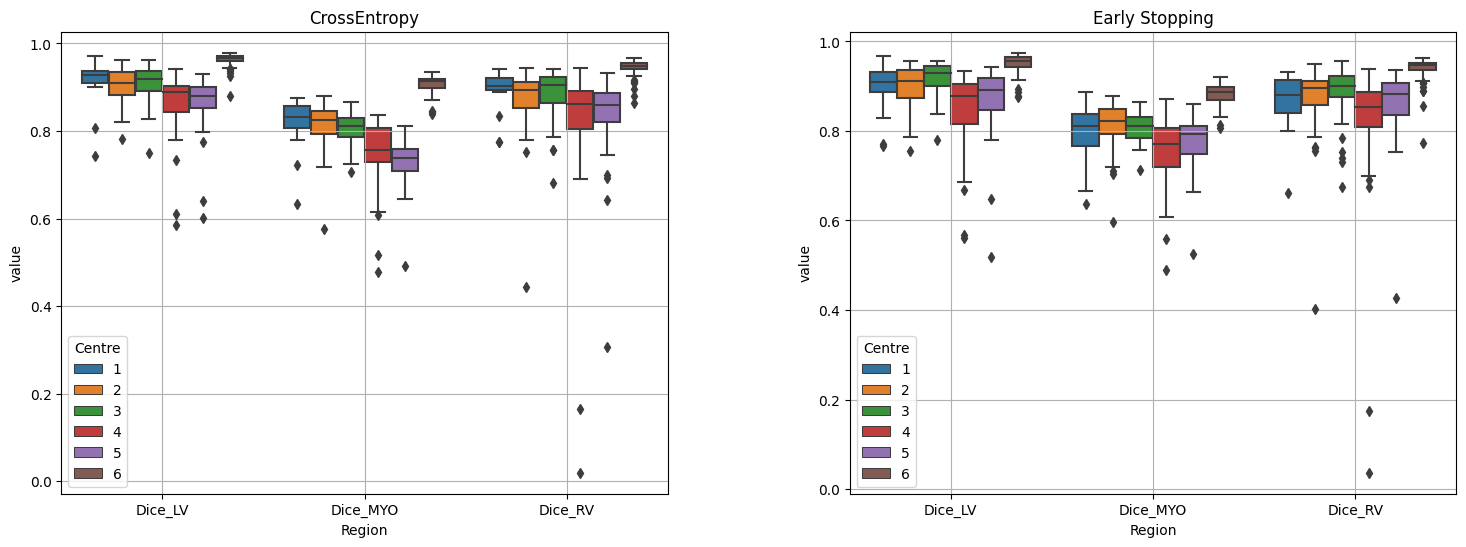

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=results2.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_MYO', 'Dice_RV'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax1)

ax1.set_title("CrossEntropy")
ax1.grid(True)

sns.boxplot(data=results3.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_MYO', 'Dice_RV'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax2)

ax2.set_title("Early Stopping")
ax2.grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()